In [43]:
import pandas as pd
matches = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_pred_2223diff.csv", index_col=0)
matches

,opponent,team,date,time,round,day,venue,result,gf,ga,target,y_pred,y_prob
0,Arsenal,Aston Villa,2022-08-31,19:30:00,Matchweek 5,Wed,Away,L,1,2,0,0,0.089753
1,Arsenal,Aston Villa,2023-02-18,12:30:00,Matchweek 24,Sat,Home,L,2,4,0,0,0.225011
2,Arsenal,Bournemouth,2022-08-20,17:30:00,Matchweek 3,Sat,Home,L,0,3,0,0,0.102278
3,Arsenal,Bournemouth,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,2,3,0,0,0.037251
4,Arsenal,Brentford,2022-09-18,12:00:00,Matchweek 8,Sun,Home,L,0,3,0,0,0.240540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,Southampton,2023-02-11,15:00:00,Matchweek 23,Sat,Home,L,1,2,0,0,0.495062
756,Wolves,Tottenham,2022-08-20,12:30:00,Matchweek 3,Sat,Home,W,1,0,1,1,0.757683
757,Wolves,Tottenham,2023-03-04,15:00:00,Matchweek 26,Sat,Away,L,0,1,0,1,0.515013
758,Wolves,West Ham,2022-10-01,17:30:00,Matchweek 9,Sat,Home,W,2,0,1,1,0.539175


In [44]:
odds = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_odds_2223.csv", index_col=[0,1,2])
odds

date  \
league             season game                                                      
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   2022-08-05 20:00:00   
                          2022-08-06 Bournemouth-Aston Villa  2022-08-06 15:00:00   
                          2022-08-06 Everton-Chelsea          2022-08-06 17:30:00   
                          2022-08-06 Fulham-Liverpool         2022-08-06 12:30:00   
                          2022-08-06 Leeds United-Wolves      2022-08-06 15:00:00   
...                                                                           ...   
                          2023-05-28 Everton-Bournemouth      2023-05-28 16:30:00   
                          2023-05-28 Leeds United-Tottenham   2023-05-28 16:30:00   
                          2023-05-28 Leicester City-West Ham  2023-05-28 16:30:00   
                          2023-05-28 Manchester Utd-Fulham    2023-05-28 16:30:00   
                          2023-05-28 Southampton-Liverpool    2023-05-28 16:30:00   

                                                                   home_team  \
league             season game                                                 
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   Crystal Palace   
                          2022-08-06 Bournemouth-Aston Villa     Bournemouth   
                          2022-08-06 Everton-Chelsea                 Everton   
                          2022-08-06 Fulham-Liverpool                 Fulham   
                          2022-08-06 Leeds United-Wolves        Leeds United   
...                                                                      ...   
                          2023-05-28 Everton-Bournemouth             Everton   
                          2023-05-28 Leeds United-Tottenham     Leeds United   
                          2023-05-28 Leicester City-West Ham  Leicester City   
                          2023-05-28 Manchester Utd-Fulham    Manchester Utd   
                          2023-05-28 Southampton-Liverpool       Southampton   

                                                                away_team  \
league             season game                                              
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal       Arsenal   
                          2022-08-06 Bournemouth-Aston Villa  Aston Villa   
                          2022-08-06 Everton-Chelsea              Chelsea   
                          2022-08-06 Fulham-Liverpool           Liverpool   
                          2022-08-06 Leeds United-Wolves           Wolves   
...                                                                   ...   
                          2023-05-28 Everton-Bournemouth      Bournemouth   
                          2023-05-28 Leeds United-Tottenham     Tottenham   
                          2023-05-28 Leicester City-West Ham     West Ham   
                          2023-05-28 Manchester Utd-Fulham         Fulham   
                          2023-05-28 Southampton-Liverpool      Liverpool   

                                                              B365H  B365D  \
league             season game                                               
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal    4.20   3.60   
                          2022-08-06 Bournemouth-Aston Villa   3.75   3.50   
                          2022-08-06 Everton-Chelsea           5.50   4.00   
                          2022-08-06 Fulham-Liverpool         11.00   6.00   
                          2022-08-06 Leeds United-Wolves       2.25   3.40   
...                                                             ...    ...   
                          2023-05-28 Everton-Bournemouth       1.50   4.50   
                          2023-05-28 Leeds United-Tottenham    2.75   3.80   
                          2023-05-28 Leicester City-West Ham   1.91   3.80   
                          2023-05-28 Manchester Utd-Fulham     1.50   

In [45]:
def add_key_col(hist):
    ew_game=hist['date'] +' ' + hist['team']+'-' + hist['opponent']
    # ew_game=hist['date'].dt.date.astype('string') +' ' + hist['home_team']+'-' + hist['away_team']
    return ew_game

matches['key']=add_key_col(matches)
matches=matches.set_index('key')

In [46]:
odds2=odds.droplevel([0,1]).iloc[:,-6:]

In [47]:
matches2=matches.join(odds2).dropna()

In [67]:
c1=matches2.target==matches2.y_pred
c2=matches2.target==1
c3=matches2.y_pred==1
matches2[c1&c2]

,opponent,team,date,time,round,day,venue,result,gf,ga,target,y_pred,y_prob,AvgH,AvgD,AvgA,pAvgH,pAvgD,pAvgA
key,,,,,,,,,,,,,,,,,,,
2023-04-26 Manchester City-Arsenal,Arsenal,Manchester City,2023-04-26,20:00:00,Matchweek 33,Wed,Home,W,4,1,1,1,0.514526,1.56,4.49,5.70,0.625134,0.210824,0.164042
2022-08-31 Arsenal-Aston Villa,Aston Villa,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,1,1,0.724698,1.47,4.63,7.00,0.664031,0.204152,0.131817
2023-02-12 Manchester City-Aston Villa,Aston Villa,Manchester City,2023-02-12,16:30:00,Matchweek 23,Sun,Home,W,3,1,1,1,0.761900,1.25,6.59,11.89,0.784049,0.141399,0.074552
2023-04-30 Manchester Utd-Aston Villa,Aston Villa,Manchester Utd,2023-04-30,14:00:00,Matchweek 34,Sun,Home,W,1,0,1,1,0.532500,1.78,3.94,4.35,0.544258,0.239691,0.216051
2022-10-29 Newcastle Utd-Aston Villa,Aston Villa,Newcastle Utd,2022-10-29,15:00:00,Matchweek 14,Sat,Home,W,4,0,1,1,0.540158,1.83,3.73,4.41,0.530659,0.255120,0.214221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-22 Manchester City-Wolves,Wolves,Manchester City,2023-01-22,14:00:00,Matchweek 21,Sun,Home,W,3,0,1,1,0.914735,1.20,7.38,14.81,0.816860,0.125106,0.058034
2023-05-13 Manchester Utd-Wolves,Wolves,Manchester Utd,2023-05-13,15:00:00,Matchweek 36,Sat,Home,W,2,0,1,1,0.792479,1.38,5.10,8.37,0.707518,0.184096,0.108386
2023-03-12 Newcastle Utd-Wolves,Wolves,Newcastle Utd,2023-03-12,16:30:00,Matchweek 27,Sun,Home,W,2,1,1,1,0.797498,1.67,3.81,5.47,0.581397,0.248663,0.169939


In [70]:
tobet=matches2[c3]
sc=['result','gf','ga','target','y_prob','pAvgH','AvgH',]
tobet=tobet[sc]

,result,gf,ga,target,y_prob,pAvgH,AvgH
key,,,,,,,
2023-04-26 Manchester City-Arsenal,W,4,1,1,0.514526,0.625134,1.56
2022-08-31 Arsenal-Aston Villa,W,2,1,1,0.724698,0.664031,1.47
2022-11-13 Brighton-Aston Villa,L,1,2,0,0.557357,0.520657,1.86
2023-05-20 Liverpool-Aston Villa,D,1,1,0,0.543127,0.654938,1.49
2023-02-12 Manchester City-Aston Villa,W,3,1,1,0.761900,0.784049,1.25
...,...,...,...,...,...,...,...
2023-05-13 Manchester Utd-Wolves,W,2,0,1,0.792479,0.707518,1.38
2023-03-12 Newcastle Utd-Wolves,W,2,1,1,0.797498,0.581397,1.67
2023-04-01 Nott'ham Forest-Wolves,D,1,1,0,0.553163,0.324438,2.96


In [79]:
tobet=tobet.sort_values('date')
tobet['in']=100
tobet['out']=tobet['in']*tobet['AvgH']
tobet.loc[tobet['target']==0,'out']=0
tobet['win']=tobet['out']-tobet['in']
tobet['balance']=tobet.win.cumsum()
tobet

,opponent,team,date,time,round,day,venue,result,gf,ga,...,AvgD,AvgA,pAvgH,pAvgD,pAvgA,in,out,win,cumwin,balance
key,,,,,,,,,,,,,,,,,,,,,
2022-08-06 Newcastle Utd-Nott'ham Forest,Nott'ham Forest,Newcastle Utd,2022-08-06,15:00:00,Matchweek 1,Sat,Home,W,2,0,...,3.80,5.57,0.582408,0.250151,0.167441,100,167.0,67.0,67.0,67.0
2022-08-06 Tottenham-Southampton,Southampton,Tottenham,2022-08-06,15:00:00,Matchweek 1,Sat,Home,W,4,1,...,5.27,8.64,0.717817,0.177653,0.104530,100,136.0,36.0,103.0,103.0
2022-08-13 Brighton-Newcastle Utd,Newcastle Utd,Brighton,2022-08-13,15:00:00,Matchweek 2,Sat,Home,D,0,0,...,3.25,3.10,0.395842,0.294710,0.309449,100,0.0,-100.0,3.0,3.0
2022-08-13 Aston Villa-Everton,Everton,Aston Villa,2022-08-13,12:30:00,Matchweek 2,Sat,Home,W,2,1,...,3.56,4.87,0.535760,0.269553,0.194687,100,182.0,82.0,85.0,85.0
2022-08-13 Manchester City-Bournemouth,Bournemouth,Manchester City,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,0,...,12.72,37.57,0.915554,0.067222,0.017224,100,107.0,7.0,92.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22 Newcastle Utd-Leicester City,Leicester City,Newcastle Utd,2023-05-22,20:00:00,Matchweek 37,Mon,Home,D,0,0,...,5.39,7.66,0.707301,0.173516,0.119183,100,0.0,-100.0,3421.0,3421.0
2023-05-25 Manchester Utd-Chelsea,Chelsea,Manchester Utd,2023-05-25,20:00:00,Matchweek 32,Thu,Home,W,4,1,...,4.35,5.12,0.598061,0.218079,0.183860,100,163.0,63.0,3484.0,3484.0
2023-05-28 Arsenal-Wolves,Wolves,Arsenal,2023-05-28,16:30:00,Matchweek 38,Sun,Home,W,5,0,...,5.33,7.87,0.710896,0.174431,0.114673,100,137.0,37.0,3574.0,3521.0


<Axes: xlabel='date'>

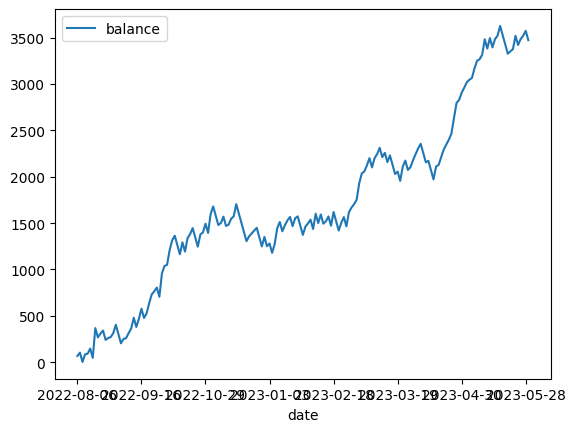

In [80]:
tobet.plot(x='date',y='balance',kind='line')